## B. Import Libraries

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
from dython.nominal import associations

# Data Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["seaborn"])

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from pickle import dump,load
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearnex import patch_sklearn 
patch_sklearn()

## C. Data Loading

### Import Dataset

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 145460 dan kolom berjumlah 23


In [4]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# Mengecek data duplikat
df.duplicated().sum()

0

## D. Data Cleaning

<Axes: >

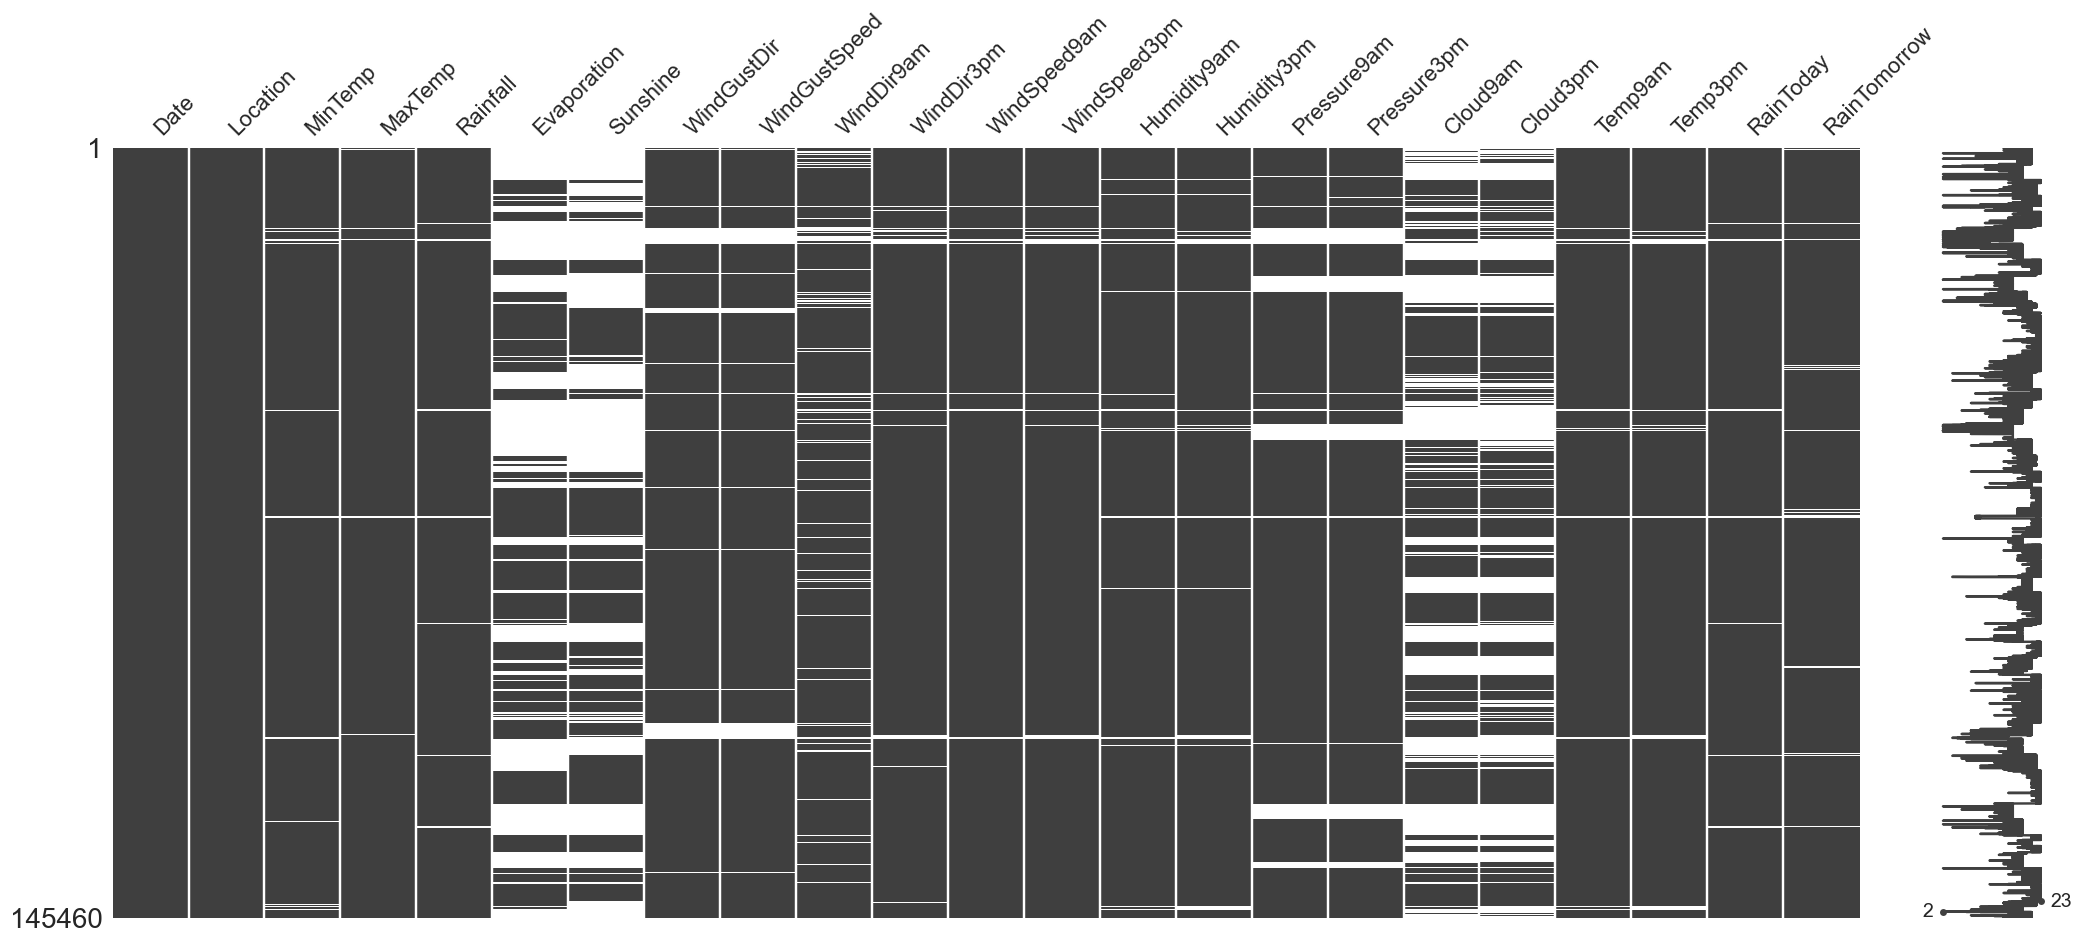

In [7]:
import missingno as msno
msno.matrix(df)

In [8]:
# Mengecek missing values
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
Sunshine,float64,69835,48.009762,145,6.5
Evaporation,float64,62790,43.166506,358,29.2
Cloud3pm,float64,59358,40.807095,10,0.0
Cloud9am,float64,55888,38.421559,10,1.0
Pressure9am,float64,15065,10.356799,546,986.6
Pressure3pm,float64,15028,10.331363,549,1023.9
WindDir9am,object,10566,7.263853,16,E
WindGustDir,object,10326,7.098859,16,ESE
WindGustSpeed,float64,10263,7.055548,67,111.0
Humidity3pm,float64,4507,3.098446,101,70.0


In [9]:
# Drop column sunshine, evaporation, cloud3pm, and cloud9am
df.drop(df[['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']], axis=1, inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [11]:
cat_cols = df.columns[df.dtypes == object]
num_cols = df.columns[df.dtypes == float]

print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")
print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")

Categorical Columns	(6)	: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Columns	(12)	: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [12]:
# Replace null values in numerical with their means and categorical with their modes.

print("Numerical Columns")
for i in num_cols:
    df[i] = df[i].fillna(df[i].mean())
    print(f"NaN values in {i} have been replaced by {round(df[i].mean(),3)}")

print("\nCategorical Columns")
for i in cat_cols:
    df[i] = df[i].fillna(df[i].mode().values[0])
    print(f"NaN values in {i} have been replaced by {df[i].mode().values[0]}")

Numerical Columns
NaN values in MinTemp have been replaced by 12.194
NaN values in MaxTemp have been replaced by 23.221
NaN values in Rainfall have been replaced by 2.361
NaN values in WindGustSpeed have been replaced by 40.035
NaN values in WindSpeed9am have been replaced by 14.043
NaN values in WindSpeed3pm have been replaced by 18.663
NaN values in Humidity9am have been replaced by 68.881
NaN values in Humidity3pm have been replaced by 51.539
NaN values in Pressure9am have been replaced by 1017.65
NaN values in Pressure3pm have been replaced by 1015.256
NaN values in Temp9am have been replaced by 16.991
NaN values in Temp3pm have been replaced by 21.683

Categorical Columns
NaN values in Location have been replaced by Canberra
NaN values in WindGustDir have been replaced by W
NaN values in WindDir9am have been replaced by N
NaN values in WindDir3pm have been replaced by SE
NaN values in RainToday have been replaced by No
NaN values in RainTomorrow have been replaced by No


In [13]:
# checking missing values again
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
# detection outliers
def create_boxplot(num1,num2,data,x_axis):
    nrows,ncols = num1,num2

    fig,ax=plt.subplots(nrows,ncols,figsize=(25,15),dpi=200)

    n = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.boxplot(data=data,x=x_axis[n],ax=ax[i,j])
            ax[i,j].set_title(f"Box Plot of {x_axis[n]}")
            n += 1

    plt.tight_layout()
    plt.show()

def find_outlier(data):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

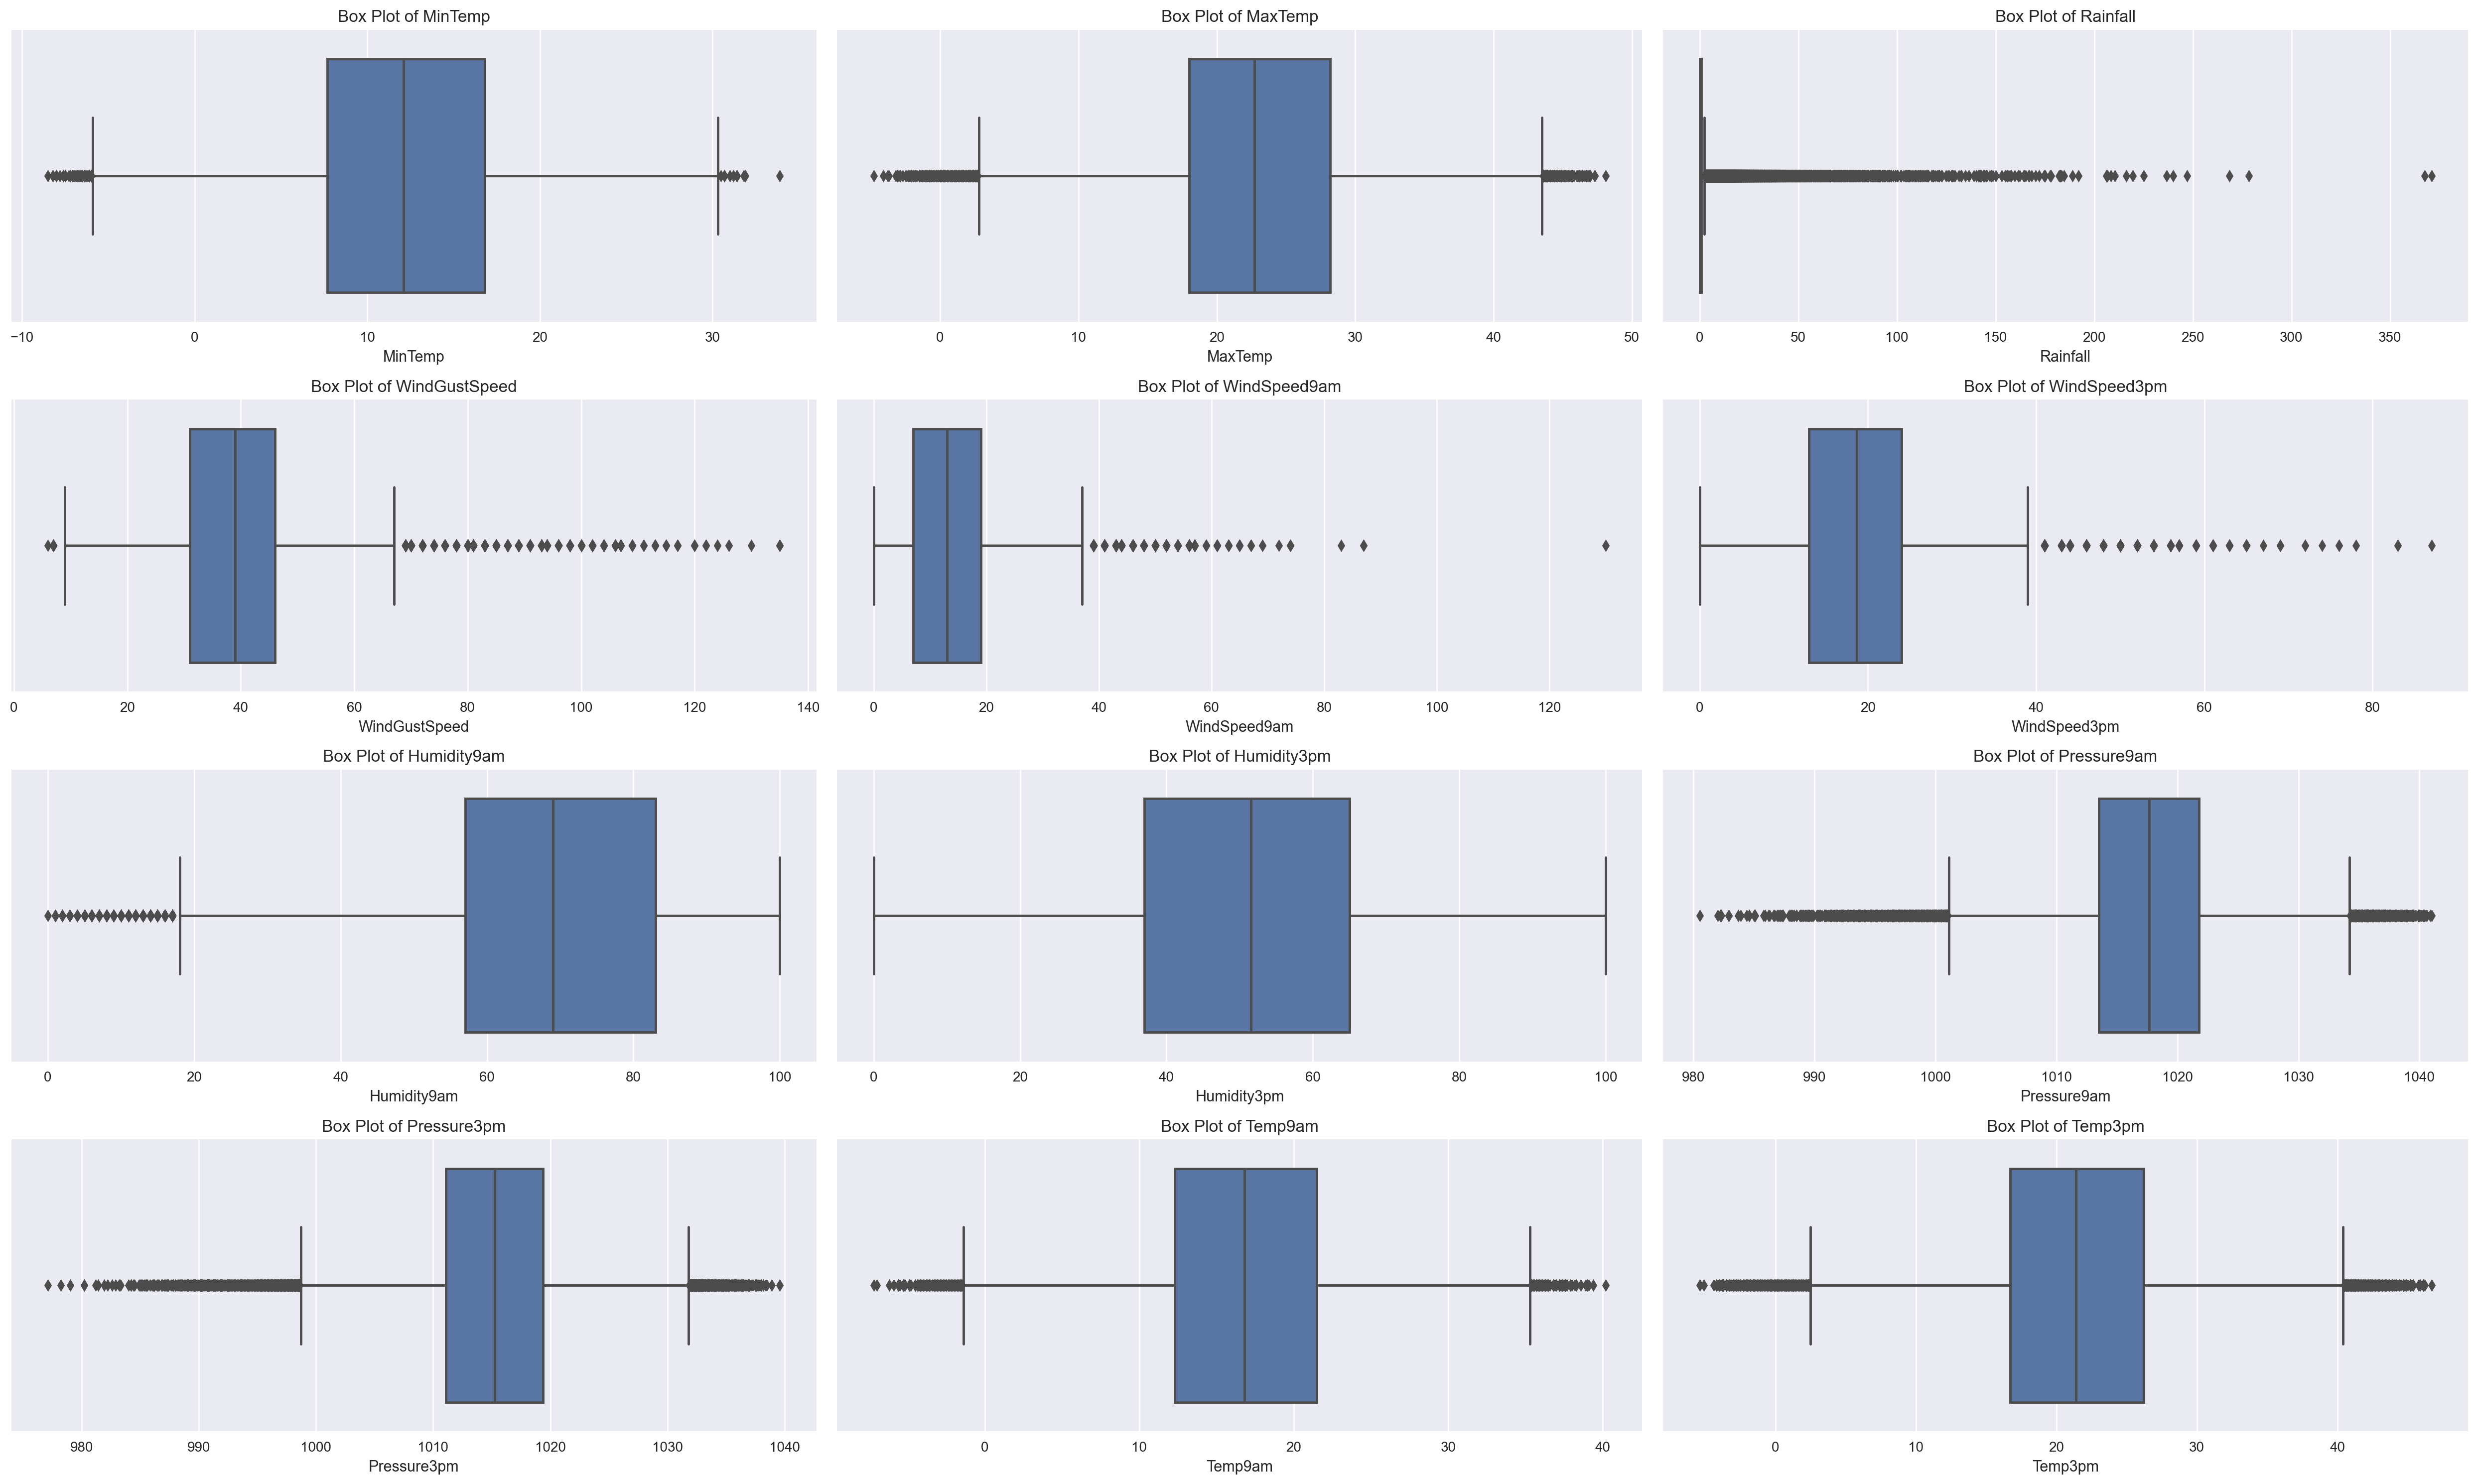

,outliers,percentage
Rainfall,23723,16.308951
WindGustSpeed,5523,3.796920
Pressure9am,2758,1.896054
Pressure3pm,2524,1.735185
WindSpeed3pm,2523,1.734497
WindSpeed9am,1817,1.249141
Humidity9am,1425,0.979651
Temp3pm,988,0.679225
MaxTemp,544,0.373986
Temp9am,307,0.211055


In [15]:
# visualize outliers
create_boxplot(4,3,df,num_cols)

pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num_cols]]) / len(df) * 100
}).set_index(num_cols).sort_values("outliers",ascending=False)

In [16]:
# Remove outliers by only taking the values that are within the upper and lower limits
for i in num_cols:
    q1 = np.quantile(df[i],0.25)
    q3 = np.quantile(df[i],0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)

    df = df[(df[i] >= min_iqr) & (df[i] <= max_iqr)]

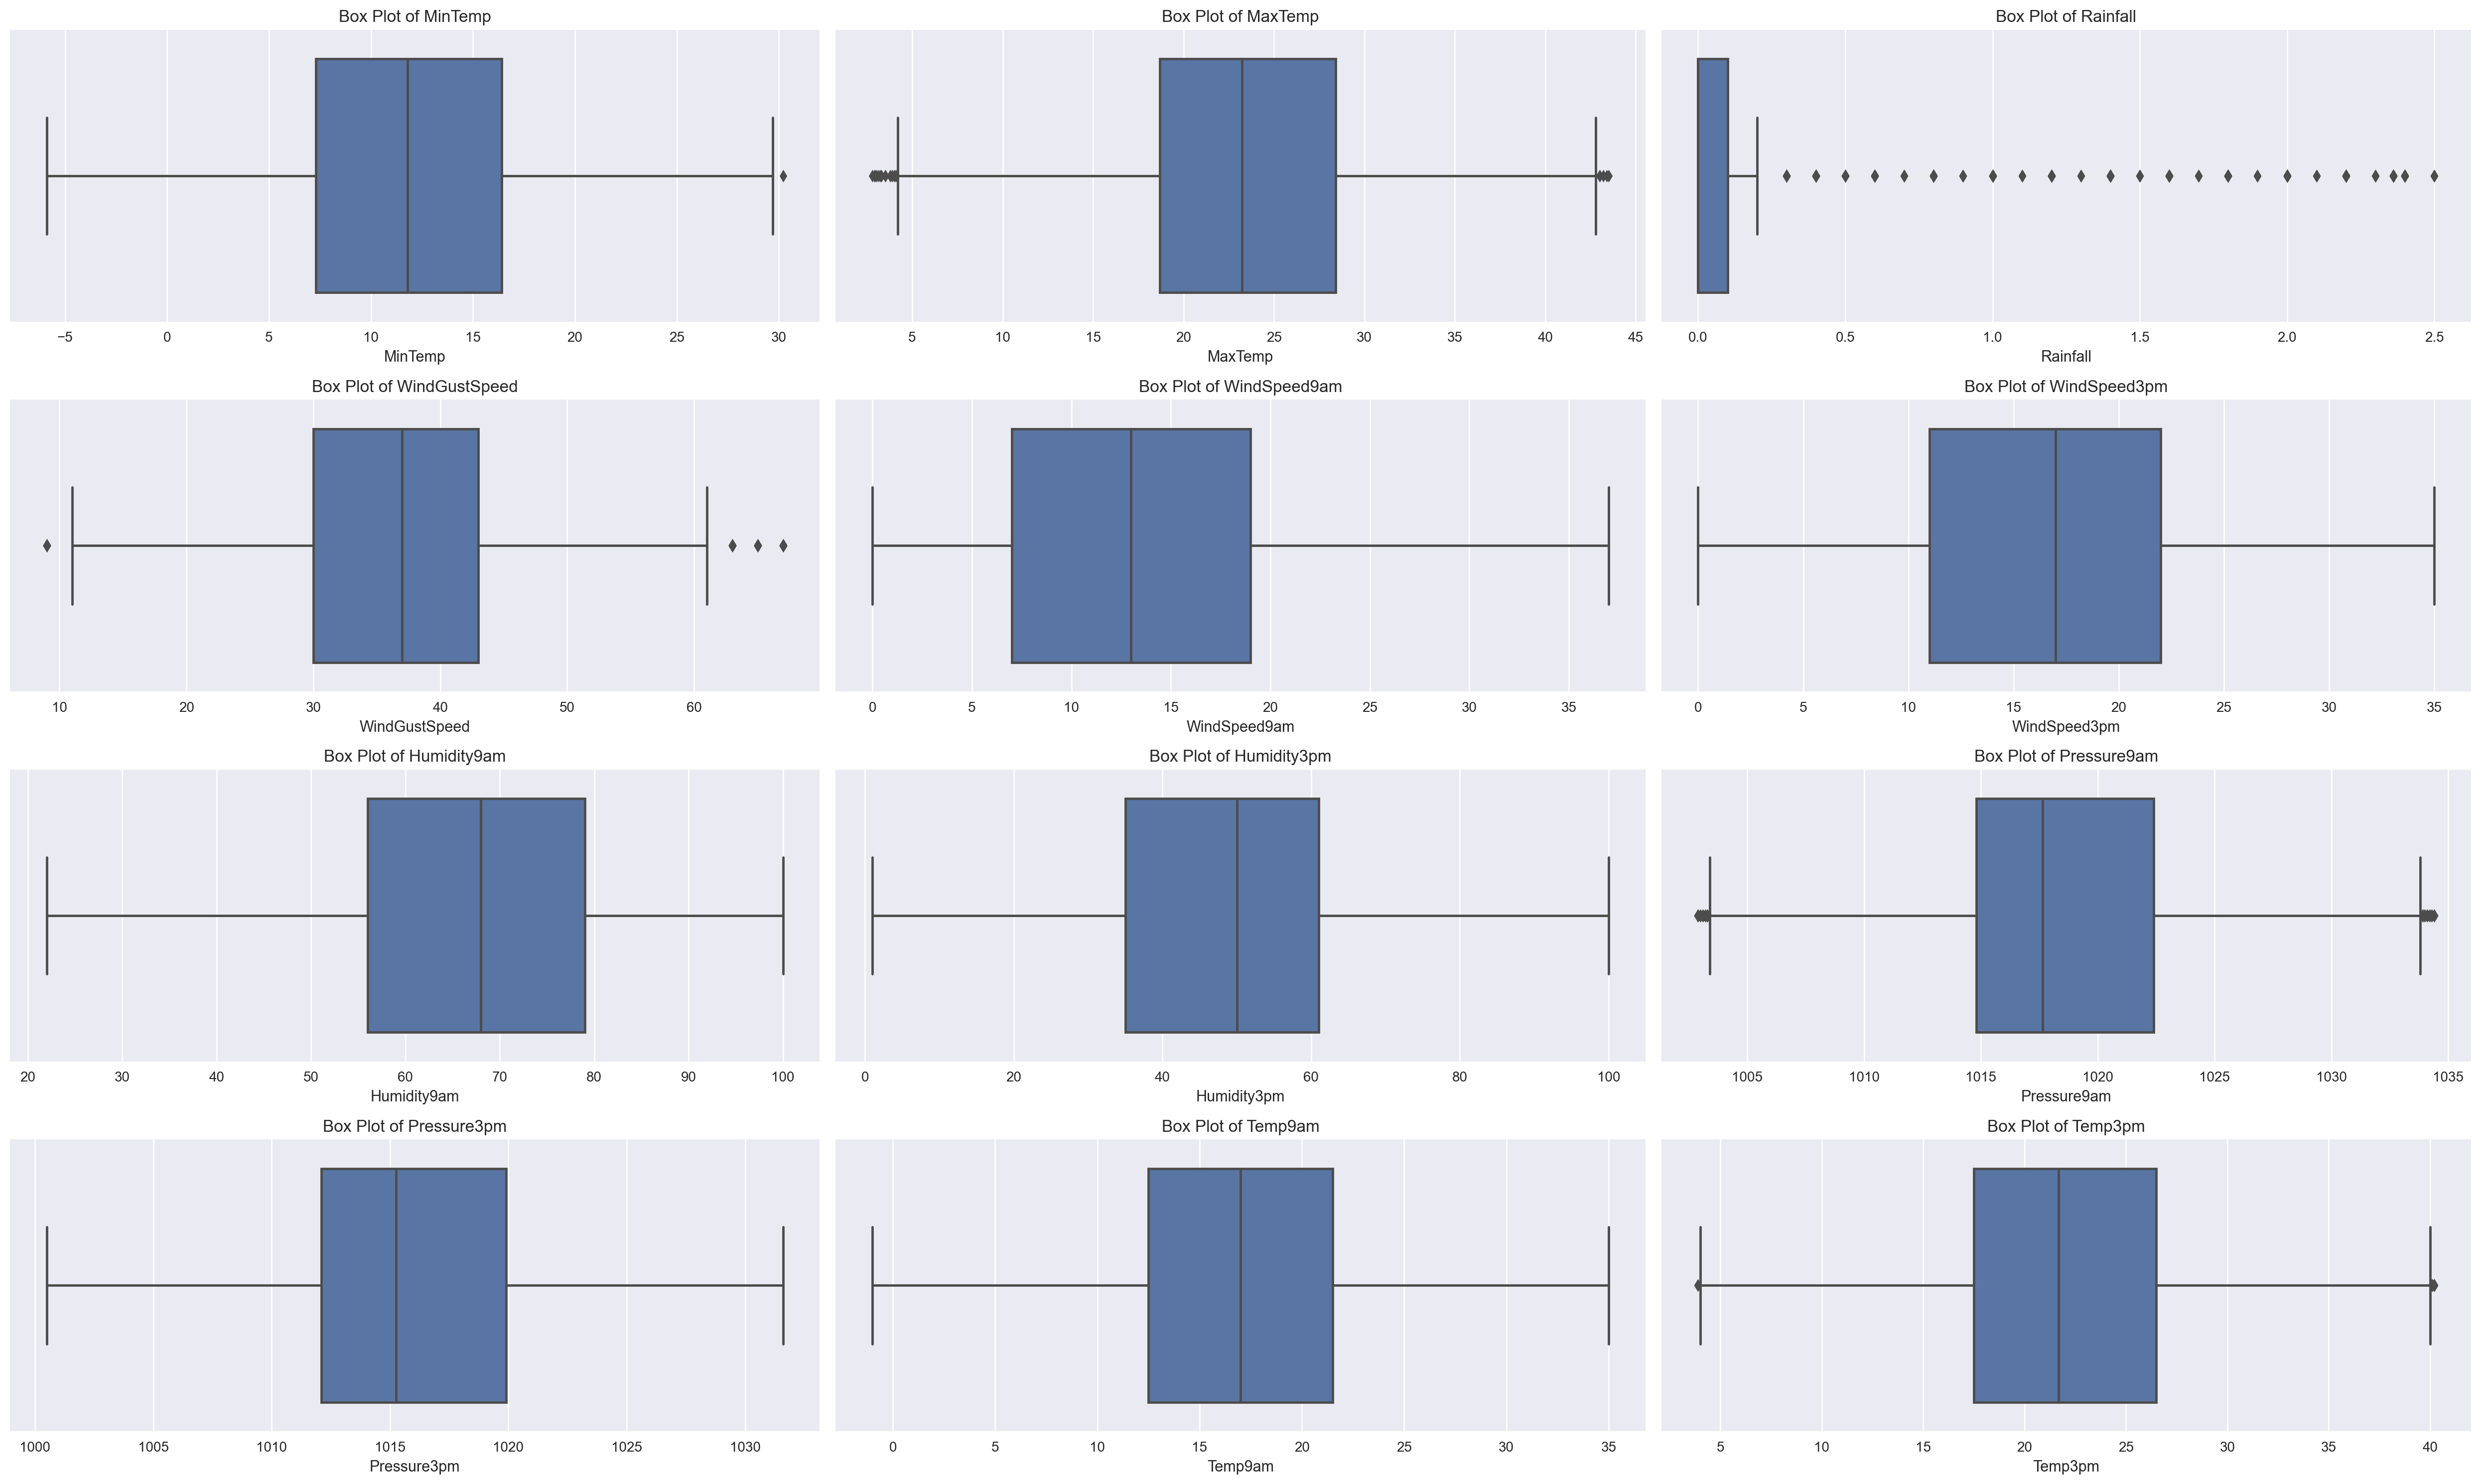

,outliers,percentage
Rainfall,19371,17.598321
WindGustSpeed,1531,1.390895
Pressure9am,283,0.257102
Temp3pm,33,0.029980
MaxTemp,20,0.018170
MinTemp,1,0.000908
WindSpeed9am,0,0.000000
WindSpeed3pm,0,0.000000
Humidity9am,0,0.000000
Humidity3pm,0,0.000000


In [17]:
# visualize again

create_boxplot(4,3,df,num_cols)

pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num_cols]]) / len(df) * 100
}).set_index(num_cols).sort_values("outliers",ascending=False)



## E. Exploration Data Analysis

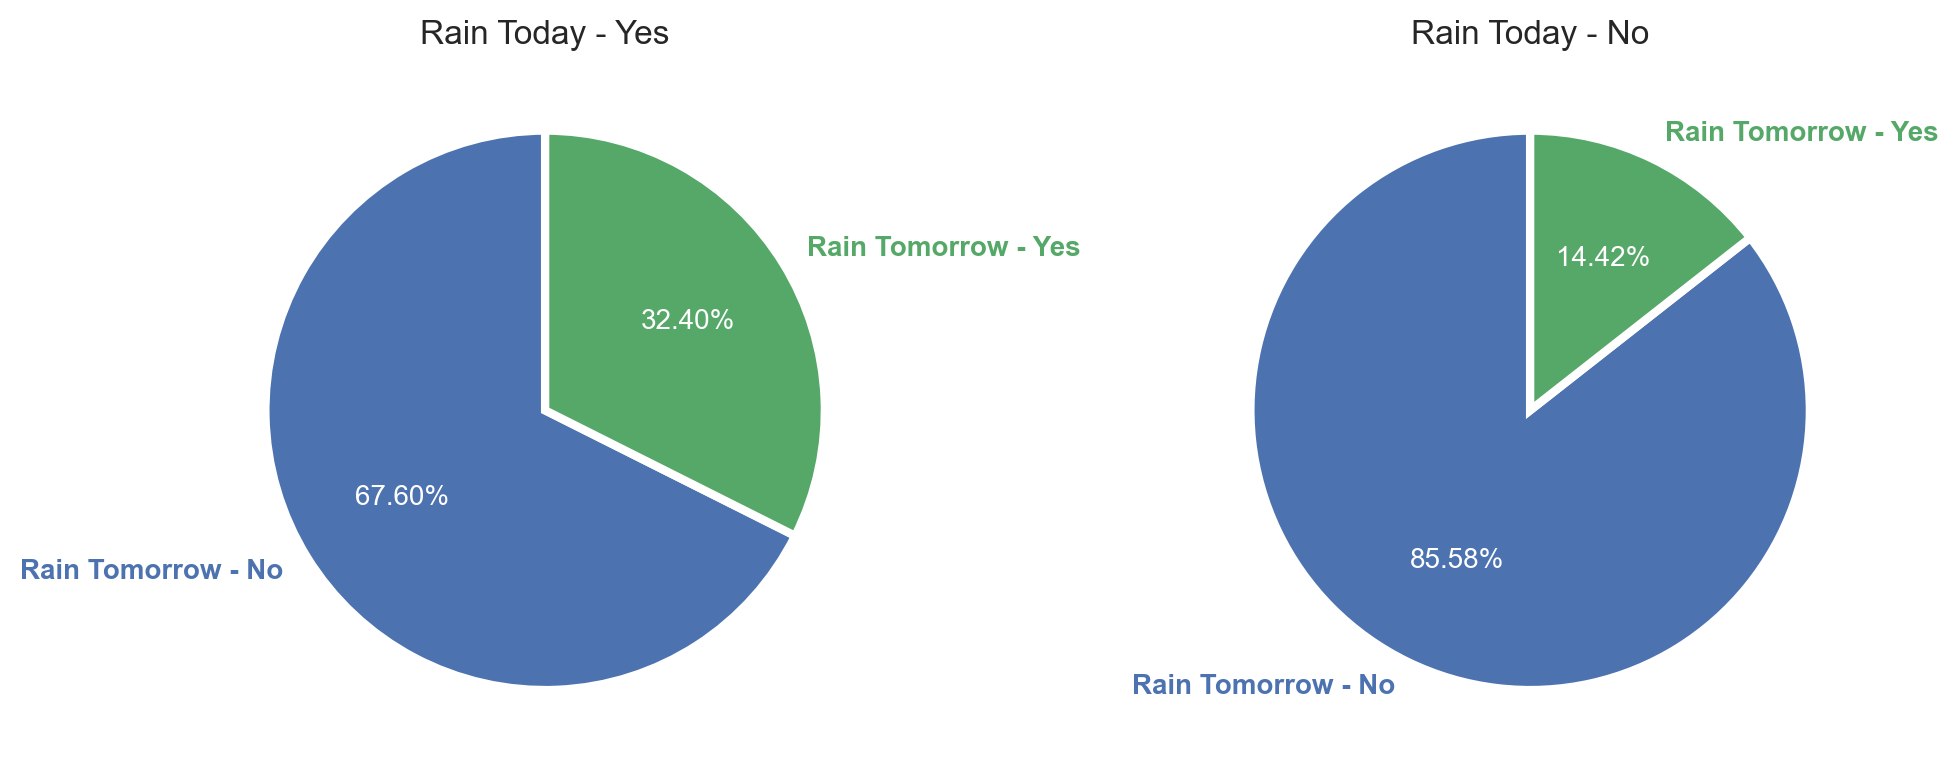

In [18]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

In [19]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

### Apply the function on the month column and create the season column 
df['Season'] = df['Date'].dt.month.apply(get_season)

# Rainfall distribution in each season
rainfall =[df['Rainfall'],df['Season']]
headers = ['Rainfall','Season']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)

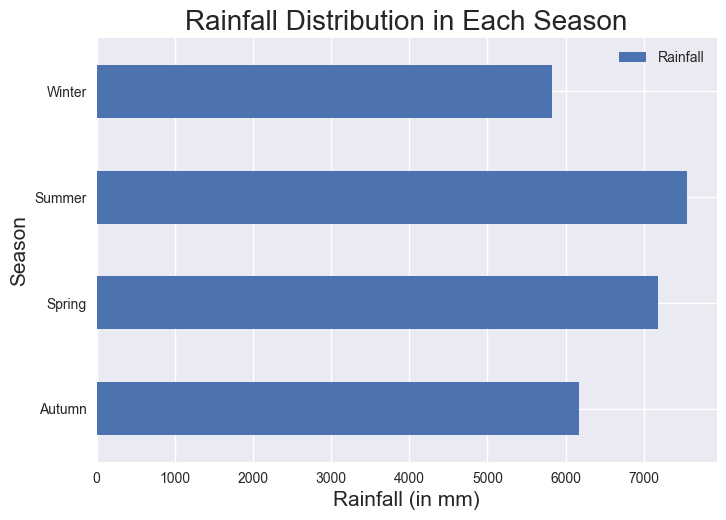

In [20]:
r = rainfall_df.groupby('Season').agg({'Rainfall':'sum'})
r.plot(kind='barh')
plt.title('Rainfall Distribution in Each Season', fontsize=20)
plt.ylabel('Season', fontsize=15)
plt.xlabel('Rainfall (in mm)', fontsize=15)
plt.show()
df.drop(df[['Season']],axis=1,inplace=True)

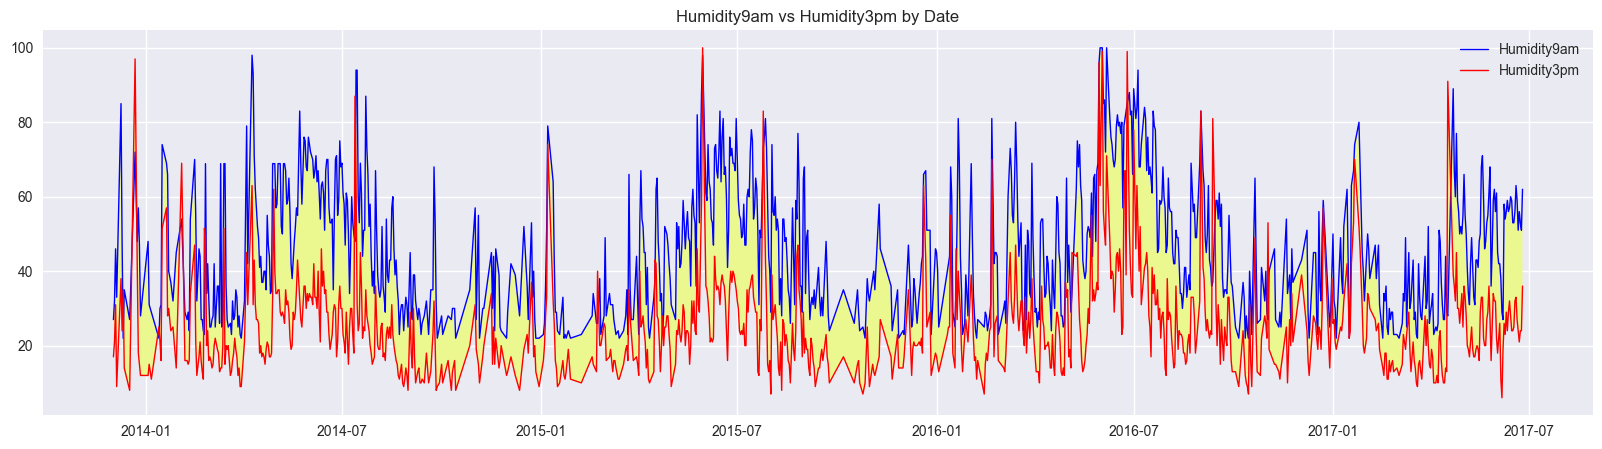

In [21]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Humidity9am'],color='blue',linewidth=1, label= 'Humidity9am')
plt.plot(df_dateplot['Date'],df_dateplot['Humidity3pm'],color='red',linewidth=1, label= 'Humidity3pm')
plt.fill_between(df_dateplot['Date'],df_dateplot['Humidity9am'],df_dateplot['Humidity3pm'], facecolor = '#EBF78F')
plt.title('Humidity9am vs Humidity3pm by Date')
plt.legend(loc='upper right', frameon=False)
plt.show()

#From above plot we can see that the Humidity is high around Jun-Jul and also during that time, there is good difference between humidity around 9am and 3pm. https://www.kaggle.com/code/siddheshera/rain-in-australia-with-eda-h2o-88-4-auc#Distribution-Plot-

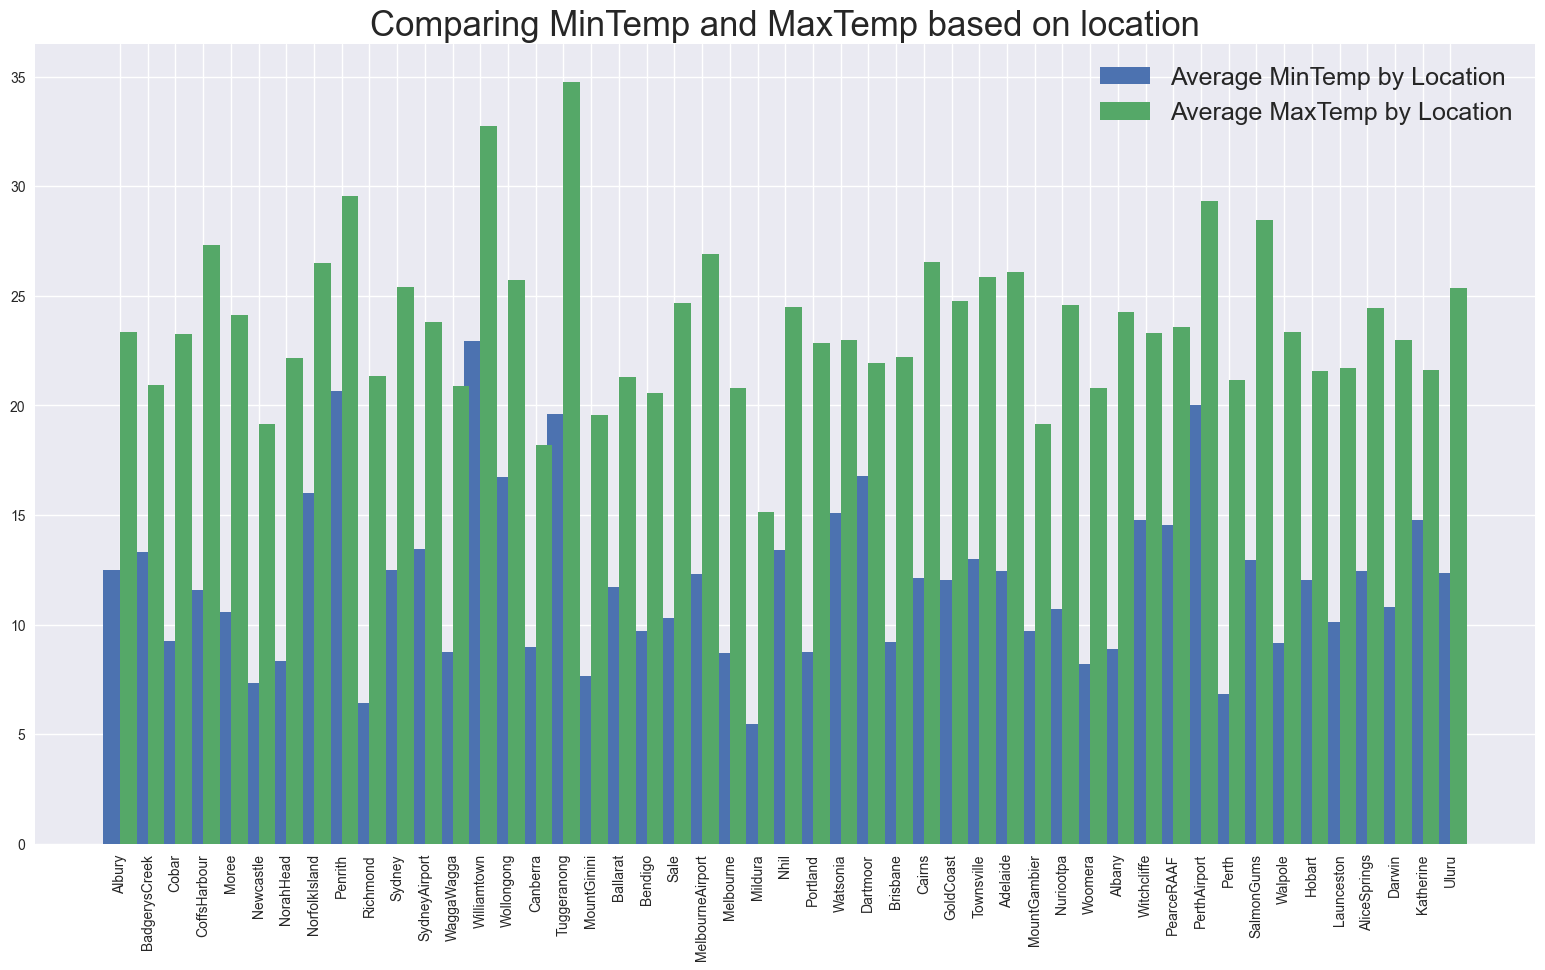

In [22]:
# Comparing mintemp and maxtemo based on location
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing MinTemp and MaxTemp based on location", fontsize=25)
plt.legend(fontsize=18)

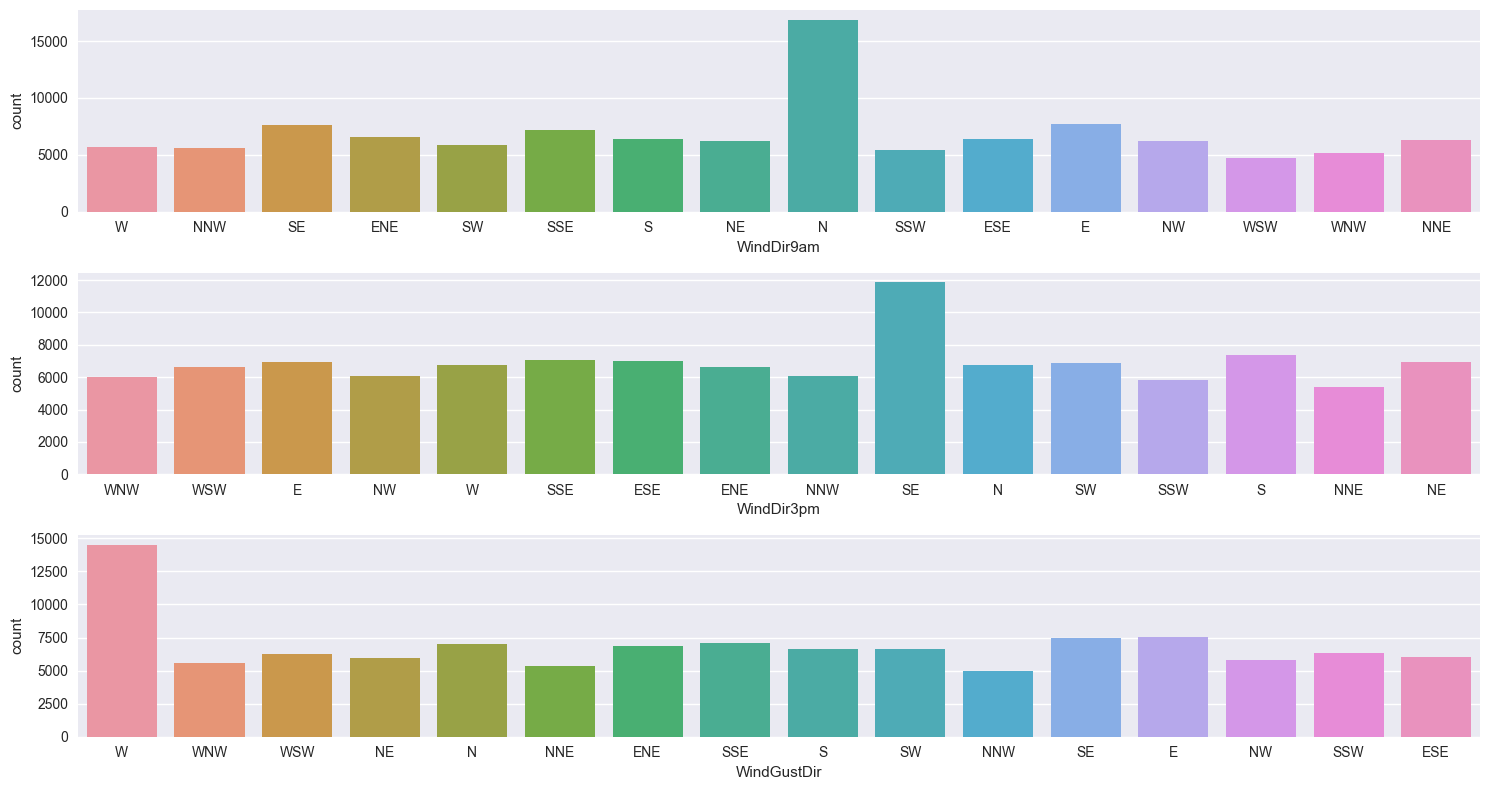

<Figure size 1000x1000 with 0 Axes>

In [23]:
# Direction of wind at 9 am and 3 pm
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=df,x='WindDir9am',ax=ax[0])
sns.countplot(data=df,x='WindDir3pm',ax=ax[1])
sns.countplot(data=df,x='WindGustDir',ax=ax[2])
fig.tight_layout()

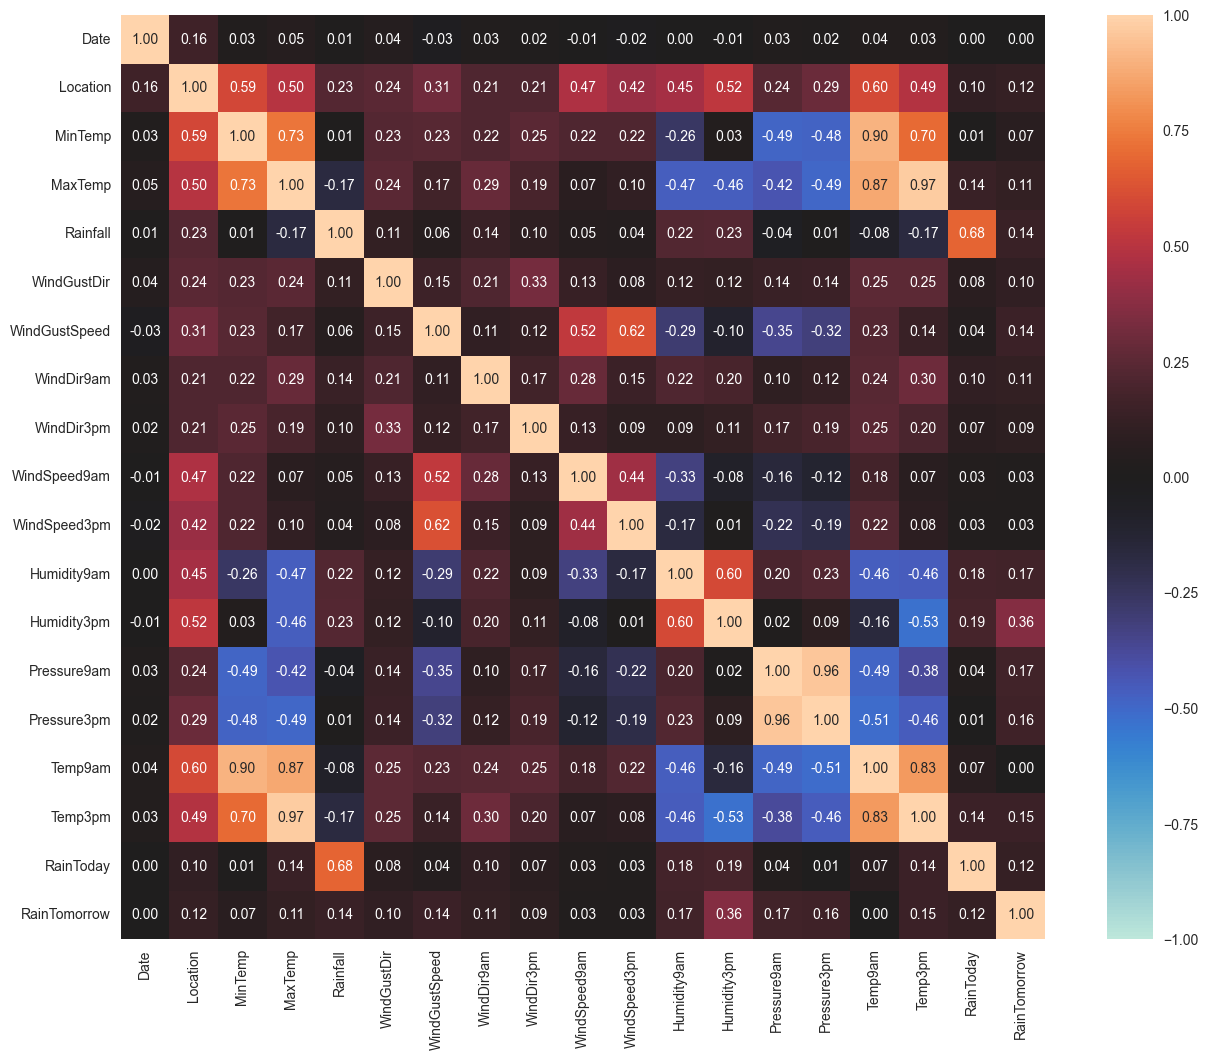

In [24]:
corr = associations(df,figsize=(16,12))

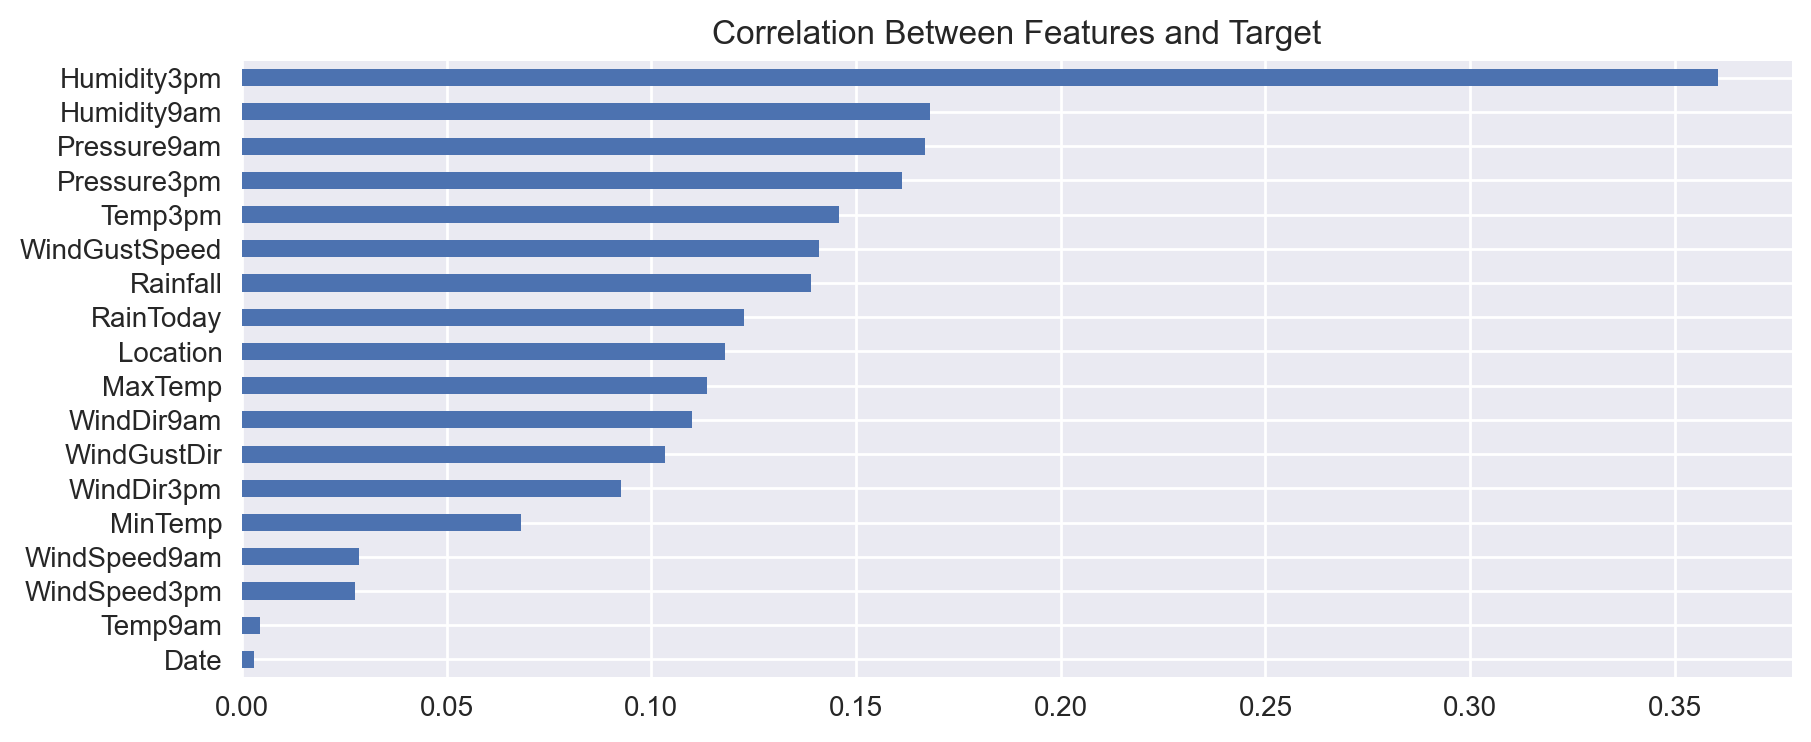

In [25]:
fig = plt.figure(figsize=(10,4),dpi=200)
corr["corr"][["RainTomorrow"]].iloc[:-1].sort_values("RainTomorrow").plot(
    kind="barh",
    legend=None,
    title="Correlation Between Features and Target",
    ax=plt.gca()
)
plt.show()

In [26]:
df = df.drop(corr["corr"][["RainTomorrow"]].sort_values("RainTomorrow").iloc[:3].index,axis=1)
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 110073
Number of Columns	: 16


## Data Preprocessing

In [27]:
df_categ = df[cat_cols]

for i in cat_cols:
    Lenc = LabelEncoder()
    df_categ[i] = Lenc.fit_transform(df_categ[i])

for i in cat_cols:
    df[i]=df_categ[i]

In [28]:
X = df.drop("RainTomorrow",axis=1)
y = df["RainTomorrow"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(f"Training dataset\t: {len(X_train)} ({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)} ({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 77051 (70%)
Testing dataset		: 33022 (30%)


In [30]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [31]:
def evaluation(y_test,y_pred):
    print(classification_report(y_test,y_pred))

    true_yes = confusion_matrix(y_test,y_pred)[1,1]
    false_yes = confusion_matrix(y_test,y_pred)[1,0]
    true_no = confusion_matrix(y_test,y_pred)[0,0]
    false_no = confusion_matrix(y_test,y_pred)[0,1]

    print(f"True\x1B[3m Yes\x1B[0m\t: {true_yes}\t({round(true_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"False\x1B[3m Yes\x1B[0m\t: {false_yes}\t({round(false_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"True\x1B[3m No\x1B[0m\t\t: {true_no}\t({round(true_no / (true_no + false_no) * 100,2)}%)")
    print(f"False\x1B[3m No\x1B[0m\t: {false_no}\t({round(false_no / (true_no + false_no) * 100,2)}%)")

    plt.figure(dpi=100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.grid(False)
    plt.show()

Logistic

              precision    recall  f1-score   support

           0       0.94      0.75      0.83     27893
           1       0.35      0.74      0.48      5129

    accuracy                           0.75     33022
   macro avg       0.65      0.74      0.65     33022
weighted avg       0.85      0.75      0.78     33022

True Yes	: 3771	(73.52%)
False Yes	: 1358	(26.48%)
True No		: 20925	(75.02%)
False No	: 6968	(24.98%)


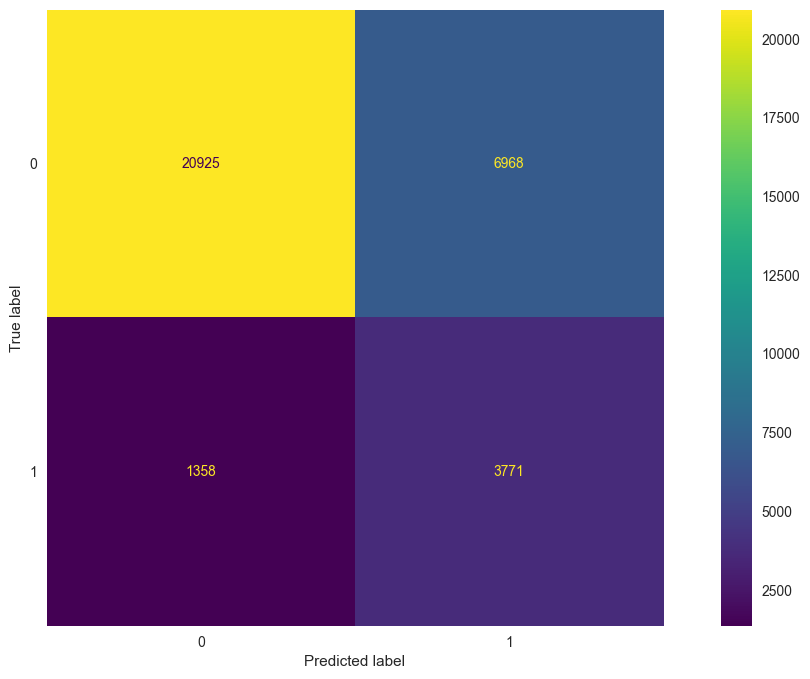

In [32]:
log_model = LogisticRegression(class_weight="balanced",random_state=42,max_iter=100)
log_model.fit(scaled_X_train,y_train)

log_pred = log_model.predict(scaled_X_test)
log_prob = log_model.predict_proba(scaled_X_test)

evaluation(y_test,log_pred)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     27893
           1       0.68      0.28      0.40      5129

    accuracy                           0.87     33022
   macro avg       0.78      0.63      0.66     33022
weighted avg       0.85      0.87      0.84     33022

True Yes	: 1441	(28.1%)
False Yes	: 3688	(71.9%)
True No		: 27206	(97.54%)
False No	: 687	(2.46%)


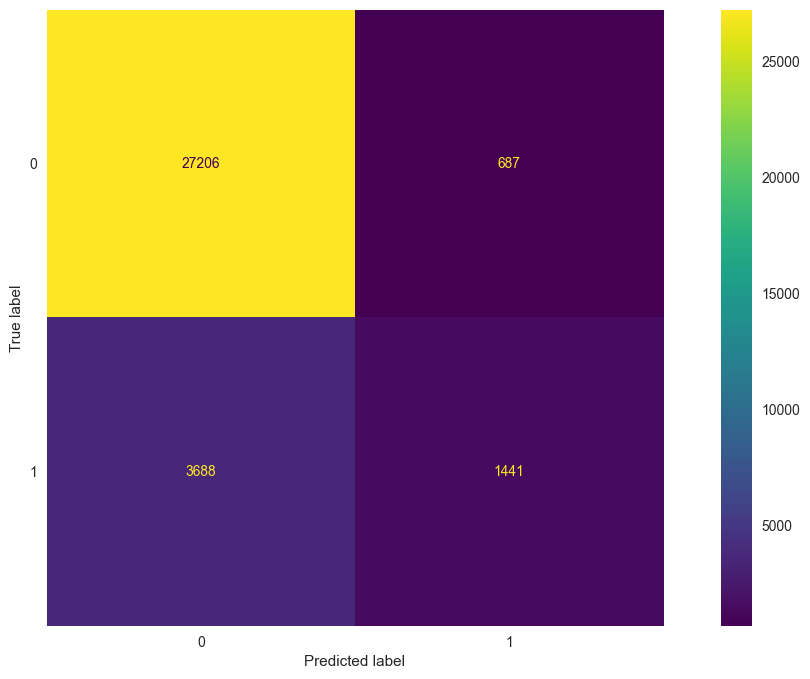

In [33]:
logreg = LogisticRegression(solver='liblinear', random_state = 0)
logreg.fit(scaled_X_train,y_train)

logpred = logreg.predict(scaled_X_test)
logprob = logreg.predict_proba(scaled_X_test)

evaluation(y_test,logpred)

SVM

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     27893
           1       0.39      0.76      0.52      5129

    accuracy                           0.78     33022
   macro avg       0.67      0.77      0.69     33022
weighted avg       0.86      0.78      0.80     33022

True Yes	: 3875	(75.55%)
False Yes	: 1254	(24.45%)
True No		: 21850	(78.34%)
False No	: 6043	(21.66%)


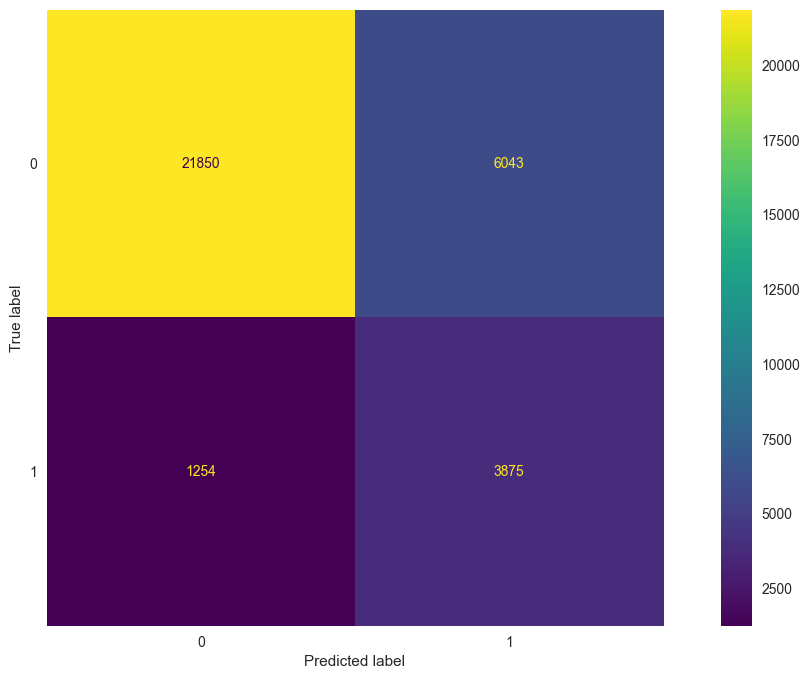

In [34]:
svm_model = SVC(class_weight="balanced",random_state=42)
svm_model.fit(scaled_X_train,y_train)
svm_pred = svm_model.predict(scaled_X_test)
evaluation(y_test,svm_pred)

              precision    recall  f1-score   support

           0       0.84      1.00      0.92     27893
           1       0.00      0.00      0.00      5129

    accuracy                           0.84     33022
   macro avg       0.42      0.50      0.46     33022
weighted avg       0.71      0.84      0.77     33022

True Yes	: 0	(0.0%)
False Yes	: 5129	(100.0%)
True No		: 27893	(100.0%)
False No	: 0	(0.0%)


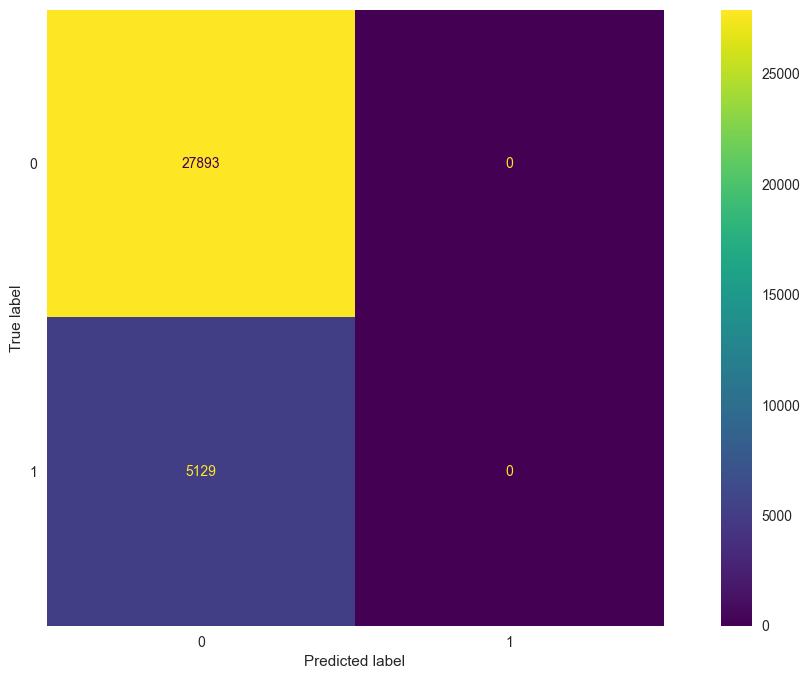

In [35]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(scaled_X_train,y_train)
svmpred = svm.predict(scaled_X_test)
evaluation(y_test,svmpred)